In [3]:
#Install WordCloud once.
#!pip install wordcloud

In [4]:
from wordcloud import WordCloud
import numpy as np
import nltk
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # From the Pillow library import the Image module.
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline

## 1. Visualize the text data as a WordCloud:

In [5]:
os.chdir(r'C:\Users\Gram\Desktop\myPyCode\04 머신러닝 - 실습\data')                

In [6]:
f = open("./book_three_little_pigs.txt",'r',encoding='UTF8')
my_book = f.readlines()
f.close()

### 1.1. Pre-processing: 전처리

In [7]:
n_min = 4                                                           # Minimum number of characters. 
corpus = []
lemmatizer = WordNetLemmatizer()
for a_line in my_book:
    pre = re.sub(r'\W', ' ', a_line)                                # Substitute the non-alphanumerics character by space.
    pre = re.sub(r'\d+','', pre)                                    # Remove numbers.
    pre = nltk.word_tokenize(pre)                                   # Tokenize into words.
    pre = [x for x in pre if len(x) > n_min]                        # Minimum length.
    pre = [x.lower() for x in pre]                                  # Convert into the lowercase.
    pre = [x for x in pre if x not in stopwords.words('english')]   # Remove stopwords.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # Lemmatize.
    corpus += pre                                                   # Back to the corpus.

In [8]:
len(corpus)

184

### 1.2. Generate a basic wordcloud:

In [9]:
# WordCloud requires that the imput data be a single long string.
a_long_sentence = ' '.join(corpus)

In [10]:
wc = WordCloud(background_color='white', max_words=30)              # Customize the output.
wc.generate(a_long_sentence)
# wc.words_                                                          # Check for the top ranking words.                                                         

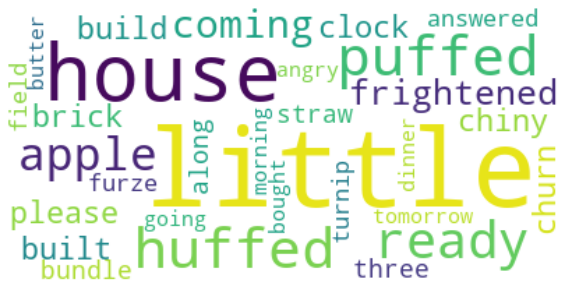

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.show()

### 1.3. Generate wordcloud using a mask:

In [12]:
# Pick a background mask.
#img = Image.open('background_1.png')                    # Elipse.
#img = Image.open('background_2.png')                   # Speech bubble.
#img = Image.open('background_3.png')                    # Heart.
img = Image.open('background_4.png')                    # Circle.
back_mask = np.array(img)

In [13]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # Customize the output. 
wc.generate(a_long_sentence) 

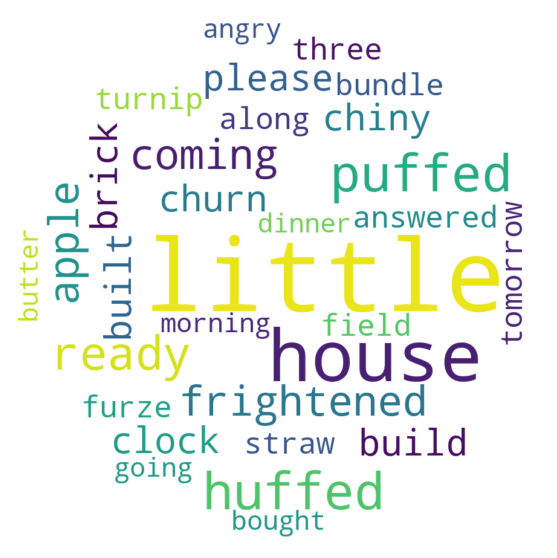

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.savefig("out.png")                             # Save to an external file.  
plt.show()